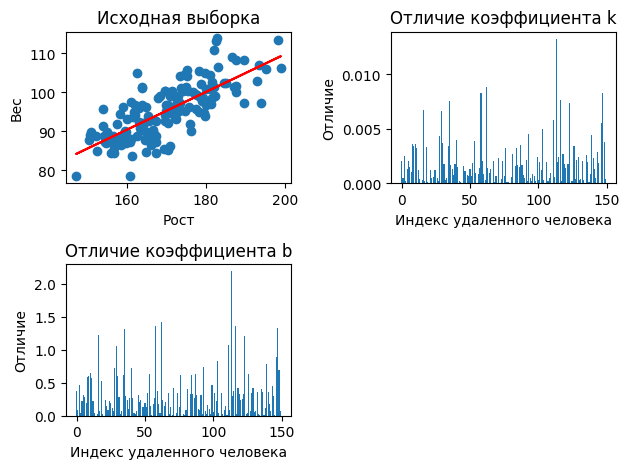

Max delta k: 0.01
Max delta b: 2.19
True k: 0.49
True b: 12.66


In [1]:
import sensitivity as s
import numpy as np

n_sample = 150

X = np.random.normal(170, 10, n_sample).reshape(-1, 1)
y = 0.5*X + 10 + np.random.normal(0, 5, n_sample).reshape(-1, 1)

k, b = s.getsensitivity(X, y, all_graphs = False, last = True)

True coefficients: k=0.48, b=12.89
Iteration 1: k=0.47, b=16.12


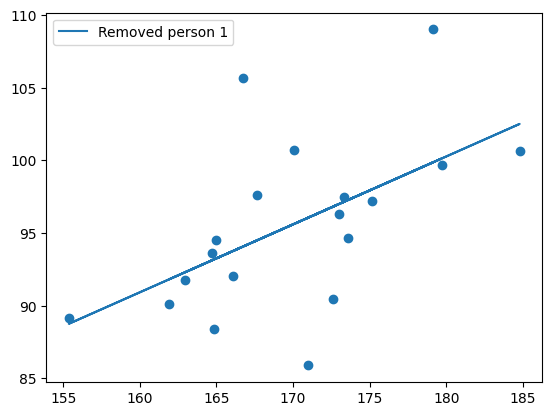

Iteration 2: k=0.49, b=11.28


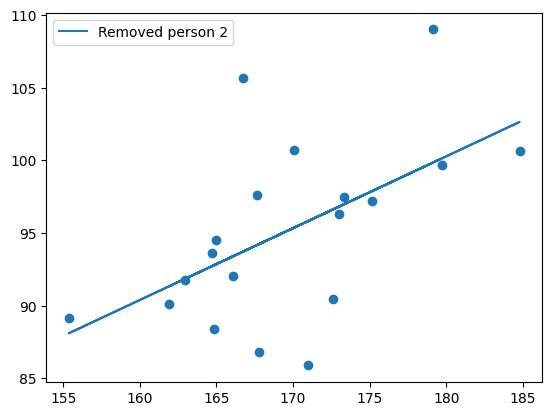

Iteration 3: k=0.52, b=6.20


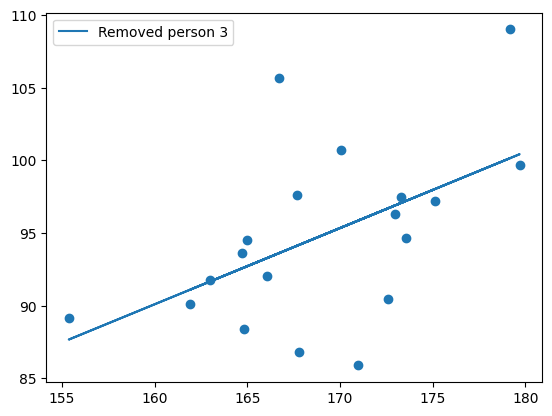

Iteration 4: k=0.46, b=17.45


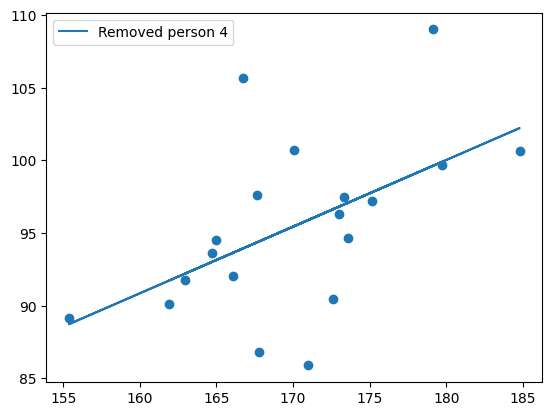

Iteration 5: k=0.47, b=14.87


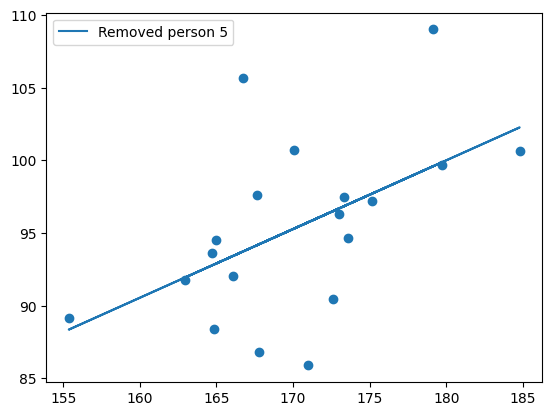

Iteration 6: k=0.49, b=11.13


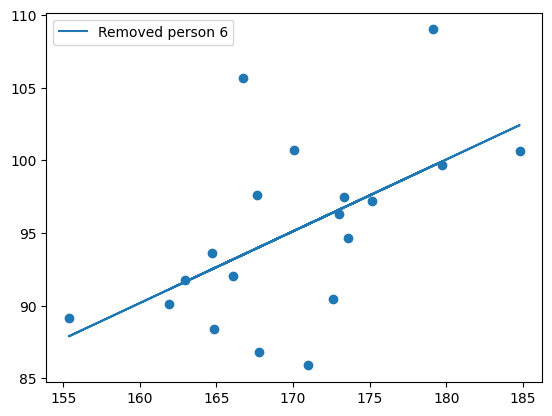

Iteration 7: k=0.37, b=31.64


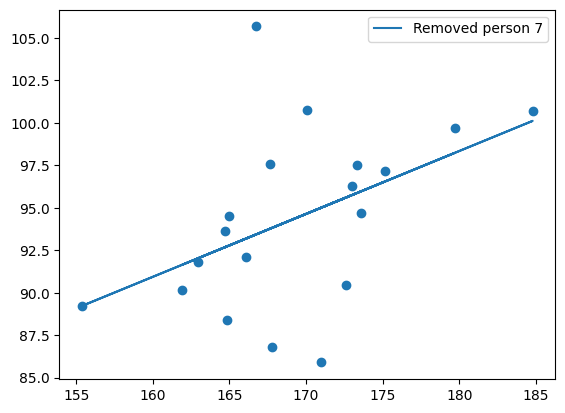

Iteration 8: k=0.48, b=13.35


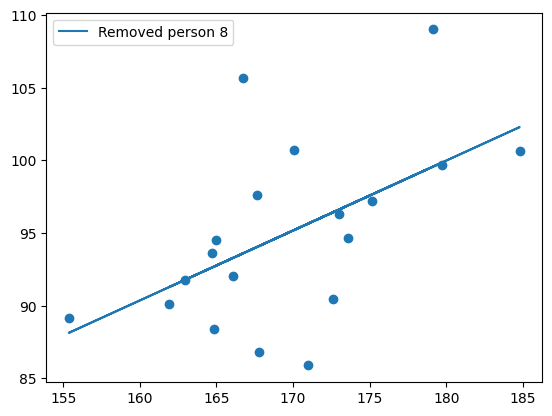

Iteration 9: k=0.49, b=11.82


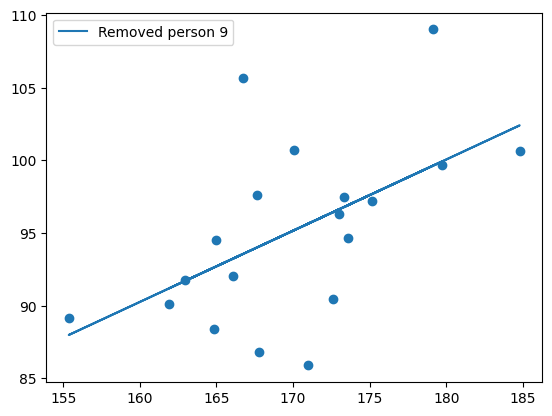

Iteration 10: k=0.49, b=12.36


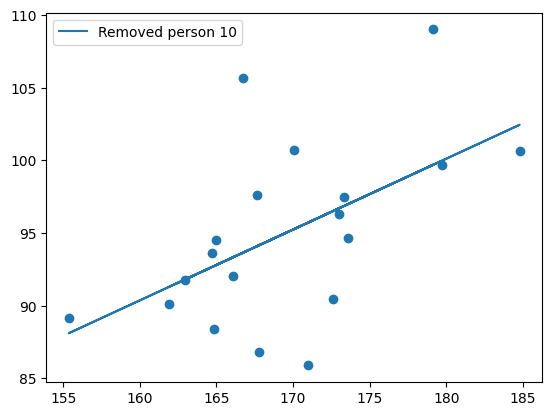

Iteration 11: k=0.50, b=11.07


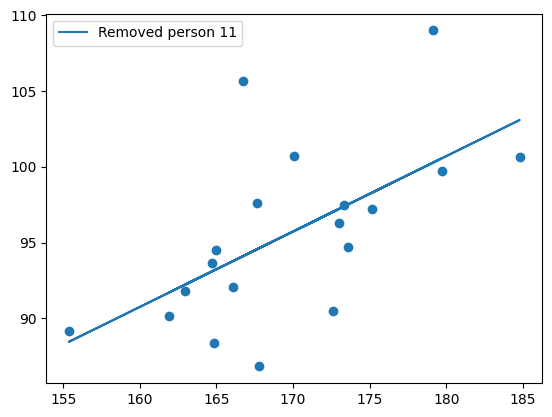

Iteration 12: k=0.49, b=12.46


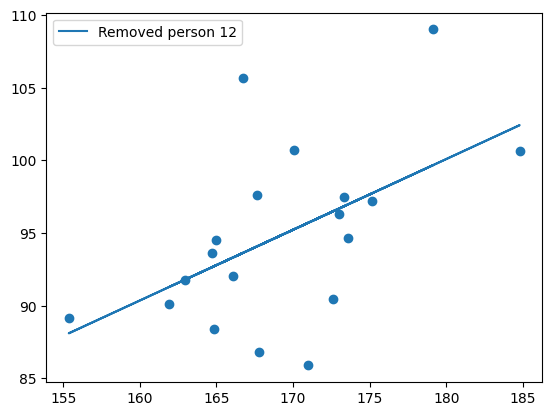

Iteration 13: k=0.48, b=12.93


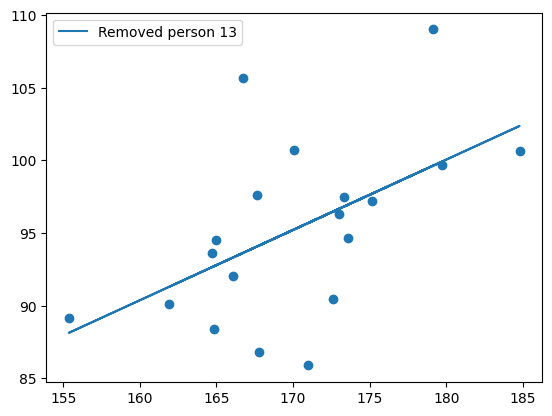

Iteration 14: k=0.53, b=4.96


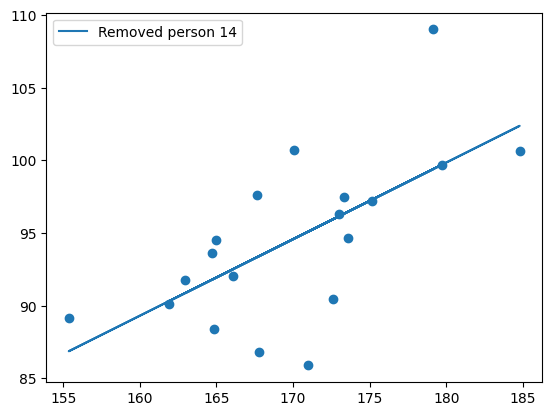

Iteration 15: k=0.48, b=13.87


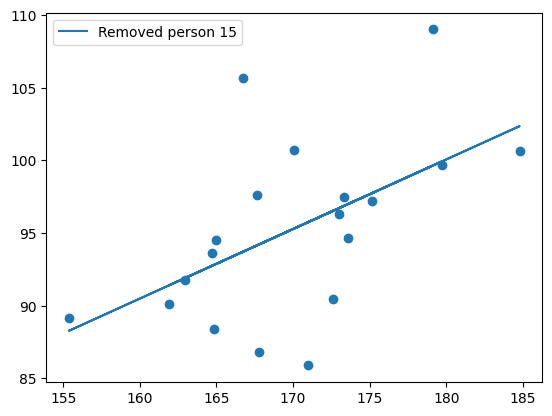

Iteration 16: k=0.51, b=8.85


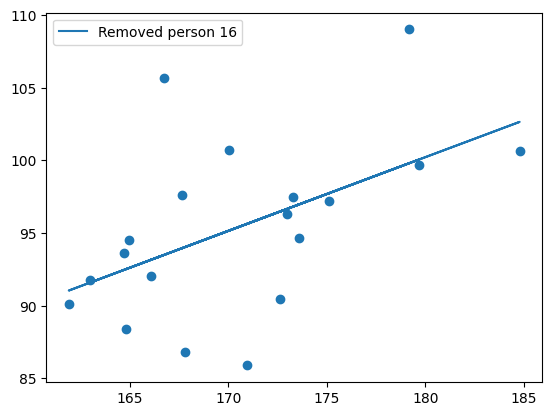

Iteration 17: k=0.49, b=12.69


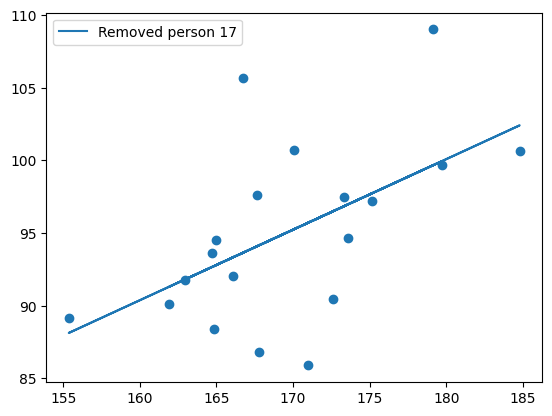

Iteration 18: k=0.50, b=9.80


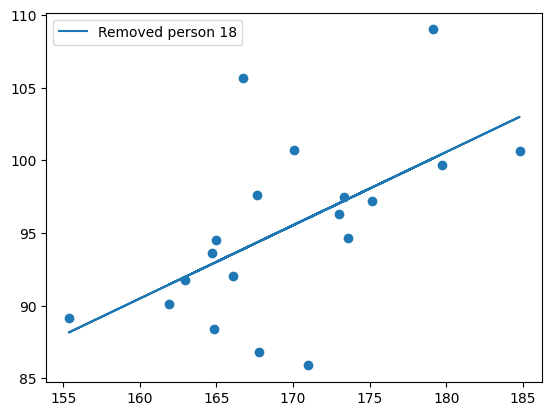

Iteration 19: k=0.48, b=12.91


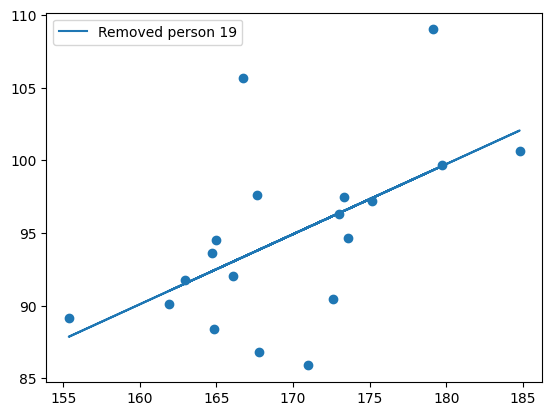

Iteration 20: k=0.49, b=11.24


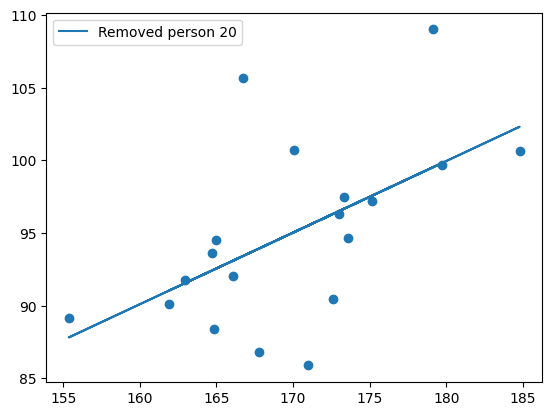

Max delta k: 0.11
Max delta b: 18.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Сгенерируем выборку из 20 человек с ростом и весом
#np.random.seed(42)
n_samples = 20
height = np.random.normal(loc=170, scale=10, size=n_samples)
weight = 0.5 * height + 10 + np.random.normal(loc=0, scale=5, size=n_samples)

# Построим линейную регрессию для всей выборки
X = height.reshape(-1, 1)
y = weight
reg = LinearRegression().fit(X, y)
k_true = reg.coef_[0]
b_true = reg.intercept_
print(f"True coefficients: k={k_true:.2f}, b={b_true:.2f}")

# Удаляем каждого человека из выборки и строим регрессию заново
deltas_k = []
deltas_b = []
for i in range(n_samples):
    X = np.delete(height, i).reshape(-1, 1)
    y = np.delete(weight, i)
    reg = LinearRegression().fit(X, y)
    k = reg.coef_[0]
    b = reg.intercept_
    delta_k = np.abs(k - k_true)
    delta_b = np.abs(b - b_true)
    deltas_k.append(delta_k)
    deltas_b.append(delta_b)
    print(f"Iteration {i+1}: k={k:.2f}, b={b:.2f}")

    # Рисуем график с исключенным i-м человеком
    plt.scatter(X, y)
    plt.plot(X, reg.predict(X), label=f"Removed person {i+1}")
    plt.legend()
    plt.show()

# Находим и выводим максимальные дельты для k и b
max_delta_k = max(deltas_k)
max_delta_b = max(deltas_b)
print(f"Max delta k: {max_delta_k:.2f}")
print(f"Max delta b: {max_delta_b:.2f}")
